### Introducción a la probabilidad y variables aleatorias

##### Algunos conceptos que vamos a ver en esta notebook son:

* Introducción a las variables aleatorias
* Simulación de variables aleatorias
* Introducción a la teoría de distribuciones estadísticas. Principales medidas.
* Aplicación de test estadísticos. Normalidad.

Las funciones de distribución y de densidad surgieron de la necesidad de generalizar los sucesos que ocurrian en la naturaleza con diversas variables aleatorias. La generalización de estos eventos permite entender mejor la incertumbre que acarrean y generar estimaciones más precisas. Sus origenes se remotan a siglos antes de cristo con Tales de Mileto (probabilidad) y luego (múcho más luego) matemáticos como Bernoulli, Laplace, Gauss, Poison, de moivre, contribuyeron a la generalización de estas funciones.

In [1]:
# Importamos las librerías que vamos a estar usando para el análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from scipy.special import comb

/tmp/ipykernel_25686/2647444952.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### ¿Que son los histogramas y que son las distribuciones de probabilidad?

En estadística, un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua (como la longitud o el peso)

De forma casera: Cuando tenemos un muestreo, muchos de estas mediciones (o datos) pueden obtener los mismos valores. Por esto, separamos nuestro muestreo en distintos "bins" y la altura de estos "bins" representa la cantidad de mediciones dentro de ese bin. Nos va a servir para saber, de formar intuitiva, por donde se encuentra la mayor cantidad de datos de nuestro muestreo e inferir probabilidades

DEFINICIÓN: Una **variable aleatoria** es una función que mapea el espacio muestral (S, conjunto de eventos posibles) con un número real. Se suele expresar con una letra (generalmente X mayúscula) al evento dentro del espacio muestral (pensar en las caras de un dado o en un experimento dicotómico). Es por esto que siempre que vemos probabilidades la vemos como:

$$
{\displaystyle {P} (X= x)}
$$

El mapeo del espacio muestral al conjunto de los reales (R) es determinístico (no es aleatorio, es cierto). La aleatoriedad viene dada con el resultado que obtenemos al observar la probabilidad de dicho evento.

Las distribuciones de probabilidad no son más que las curvas que ajusta estos histogramas. Existen distintas familias de funciones de distribución para variables aleatorias discretas y para variables aleatorias continuas aunque dependiendo de que tipo de variable aleatoria estemos hablando podemos encontrar distintos nombres. Para una variable aleatoria discreta tenemos la **función (de masa) de probabilidad** y para variables aleatorias continuas tenemos la **función de densidad**. La suma (o integral) de dichas funciones nos da la **función de distribución** (FDA). 

$$
{\displaystyle F(x)=\operatorname {P} [X\leq x]=\sum _{u\leq x}f(u)}
$$

$$
{\displaystyle F(x)=\operatorname {P} [X\leq x]=\int _{-\infty }^{x}f(u)du}
$$

Para una variable aleatoria, la FDA en un punto dado es la probabilidad de que la variable aleatoria sea menor o igual a ese punto. Por el contrario, una función de densidad de probabilidad describe la probabilidad **relativa** según la cual dicha variable aleatoria tomará determinado valor ¿Por qué relativa? Debido a la continuidad de la distribución. Como estamos hablando de una porción infinitesimal dentro de un dominio de X esa probabilidad sería muy cercana a cero. Es por esto que siempre la evaluamos en un intervalo.

Lo importante para tener una idea intuitiva (dado que estamos acostumbrados a ver histogramas) es entender cuando una variable es discreta o continua. Las funciones de masa de probabilidad si nos otorgan una probabilidad exacta pero las funciones de densidad nos otorgan una probabilidad relativa

**Intuición**: Pensemos en como vamos de una función de distribución acumulada a una función de densidad. Supongamos que tenemos para una función de distribución los sigueintes valores de (x, f(x)): (164, 0.46) (165, 0.5) (166, 0.54). El gradiente de esto es la diferencia entre f(x) sobre delta_x. Que sería (0.54-0.46)/(166-164) = 0.04. Este resultado es el valor del eje y de la función de densidad.

$$
{\displaystyle f_{X}(x)={\frac {d}{dx}}F_{X}(x)}
$$

* https://es.wikipedia.org/wiki/Histograma
* https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n

##### Distribuciones discretas

In [2]:
# Esta simulación de la distribució binomial nos dice el núumero de éxitos
# n es la cantidad de vecedes que tiramos el dado en cada muestra
# p es la verdadera probabilidad
# ¿Qué sucede si queremos contar la cantidad de veces que vemos un 1 en una tirada de un dado?
binom = np.random.binomial(n = 1, p = 1/6, size = 10)
print(binom)

[0 0 0 0 0 1 0 0 0 0]


In [3]:
# Esta simulación de la distribució binomial nos dice el núumero de éxitos
binom = np.random.binomial(n = 1, p = 1/6, size = 1000000)
print(binom)

[0 0 0 ... 0 0 0]


In [4]:
# En este caso estamos contando la cantidad de éxitos que tuvimos para el millón de tiradas.
# dado que realizamos 1 millón de simulaciones para este dato, estamos obteniendo el valor de la verdadera probabilidad
sum(binom == 1)/1000000

0.166905

In [5]:
# Pero si queremos ver la probabilidad de ver la data dada una probabilidad de éxito dada.
# Supongamos que tenemos un experimiento dicotómico en una muestra de 50 evaluaciones y tenemos 48 éxitos
n = 50  # Número total de elementos
k = 48  # Número de elementos a elegir
p = 0.95

coef_binomial = comb(n, k)
likehood = (coef_binomial) * (p**k) * ((1-p)**(n-k))
print(likehood)

0.2611013703988193


In [6]:
# Pero si queremos ver la probabilidad de ver la data dada una probabilidad de éxito dada.
n = 50  # Número total de elementos
k = 48  # Número de elementos a elegir
p = 0.8

coef_binomial = comb(n, k)
likehood = (coef_binomial) * (p**k) * ((1-p)**(n-k))
print(likehood)

0.001092736514728003


In [7]:
# Pero si queremos ver la probabilidad de ver la data dada una probabilidad de éxito dada.
n = 50  # Número total de elementos
k = 48  # Número de elementos a elegir
p = 0.85

coef_binomial = comb(n, k)
likehood = (coef_binomial) * (p**k) * ((1-p)**(n-k))
print(likehood)

0.011283063728140162


In [8]:
# Pero si queremos ver la probabilidad de ver la data dada una probabilidad de éxito dada.
n = 50  # Número total de elementos
k = 48  # Número de elementos a elegir
p = 0.9

coef_binomial = comb(n, k)
likehood = (coef_binomial) * (p**k) * ((1-p)**(n-k))
print(likehood)

0.07794289665391535


In [9]:
# Pero si queremos ver la probabilidad de ver la data dada una probabilidad de éxito dada.
n = 50  # Número total de elementos
k = 48  # Número de elementos a elegir
p = 0.98

coef_binomial = comb(n, k)
likehood = (coef_binomial) * (p**k) * ((1-p)**(n-k))
print(likehood)

0.1858008571873048


Algo sumamente importante de esto es que estamos asumiendo que la variable aleatoria es independiente.

En este último caso, intuitvamente lo que estamos haciendo es simular una cierta cantidad de veces la probabilidad de encontrar 48 éxitos en una muestra de 50 casos dada una cierta probabilidad de éxito. Es por esto que en realidad tenemos una probabilidad de probabilidades. Pero en realidad lo que nosotros siempre buscamos es lo opuesto ¿Cual es la probabilidad de dada la data conocer la verdadera probabilidad? Esto lo vamos a ver cuando veamos bayes!

##### Distribuciones continuas

In [10]:
# Parámetros
gl = 8
size = 10**6
mu = 0
sigma = 1

In [11]:
# Ahora sí creamos un vector de variables aletorias distribuidas de acuerdo a lo siguiente
s = np.random.uniform(low = 0, high = 1, size = size)
s1 = np.random.normal(loc = mu, scale = sigma, size = size)
s2 = np.random.standard_t(df = gl, size = size)

##### ¿Qué son los grádos de libertad de una distribución?

Los grados de libertad son la cantidad de observaciones independientes que pueden variar sin violar las restricciones 
asociadas a la muestra. La explicación intuitiva que aplica para las fórmulas de las distribuciones y de la varianza es que
si queremos estimar una media poblacional (o la varianza muestral) solo tenemos una única restricción. ¿Cuál es? basicamente
si tenemos una muestra con de 5 valores, solo puedo variar 4 porque el quinto valor tiene que ser tal que la media poblacional
de el verdadero valor. Por el contrario, la media muestral no tiene grados de libertad dado que no presenta restricciones.

Mientras más grados de libertad dispongamos más nos acercaremos al valor poblacional real y al verdadero comportamiento de 
la variable aleatoria en análisis.

$$
s={\sqrt {{\frac {1}{N-1}}\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}}
$$


Acá podemos ver la diferencia entre las distintas formas que tenemos de calcular el desvío estandar:

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html
* https://numpy.org/doc/stable/reference/generated/numpy.std.html

Algunos puntos interesantes de la varianza y del desvío estandar son que:

* La varianza sigue una distribución de chi-cuadrado (no puede ser negativa)
* El desvío estandar hace referencia a una muestra de datos empírica y el error estandar habla de errores en una estimación.

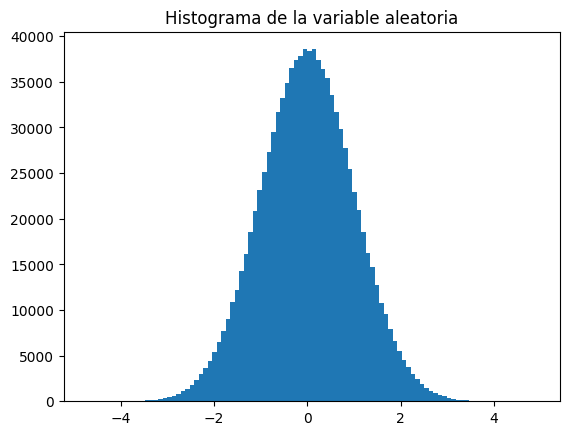

In [12]:
# Realizmaos un histograma de estas distribuciones
b = 100

plt.figure()
plt.hist(s1, bins=b)
plt.title("Histograma de la variable aleatoria")
plt.show()

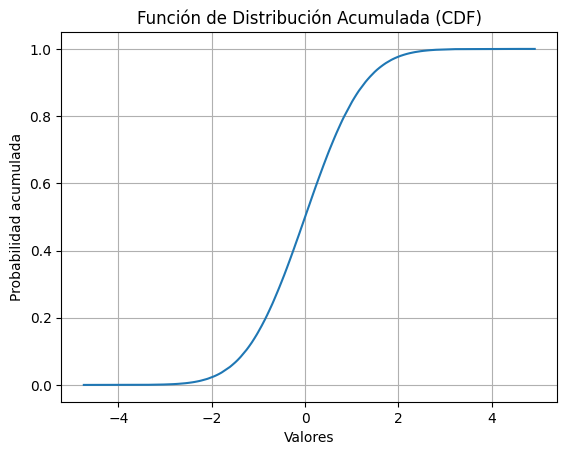

In [13]:
# Calculamos de una forma intuitiva la función de distribución acumulada (CDF)
sorted_data = np.sort(s1)
cdf = np.linspace(0, 1, len(sorted_data))

# Grafica la CDF
plt.plot(sorted_data, cdf)
plt.xlabel('Valores')
plt.ylabel('Probabilidad acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)
plt.show()

In [14]:
# Obtener el valor correspondiente a la probabilidad acumulada p
valor = st.norm.ppf(0.499999)
print(valor)

valor_2 = st.norm.ppf(0.500001)
print(valor_2)

# diferencio esto de forma discreta
print(((0.500001-0.499999)/(valor_2-valor)))

print(st.norm.pdf(0))

print("Vemos que el dato es similar al valor que vemos en el histograma teniendo en cuenta un tema de escalas")

-2.5066282745665593e-06
2.5066282747057052e-06
0.39894228040101487
0.3989422804014327
Vemos que el dato es similar al valor que vemos en el histograma teniendo en cuenta un tema de escalas


##### Calculamos los quantiles de la distribución:

Los quantiles son valores de una distribución que dividen una muestra en proporciones específicas. Para esto, los datos tienen que estar ordenados de menor a mayor. Por ejemplo, el valor del quantil de 50% de una muestra es la mediana y separa a la muestra en partes iguales.

En general, solemos hablar de percentiles. Los percentiles no son más que quantiles pero que dividen la data en 100 grupos de partes iguales.

In [15]:
# Lo primero que hacemos es generar un vector con los quantiles deseados:
percentiles = np.arange(0.0, 1.05, 0.05) * 100
print(percentiles)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


In [16]:
# Ahora calculamos los percentiles y vemos donde se encuentra cada valor
valores_percentiles = np.percentile(s1, percentiles)
print(valores_percentiles)

[-4.74292259e+00 -1.64471250e+00 -1.27936557e+00 -1.03530262e+00
 -8.41103048e-01 -6.74097080e-01 -5.24448621e-01 -3.84583678e-01
 -2.52727052e-01 -1.24543104e-01  5.11588374e-04  1.26606344e-01
  2.53569159e-01  3.85805237e-01  5.24288521e-01  6.74448631e-01
  8.41633289e-01  1.03787793e+00  1.28514369e+00  1.65190264e+00
  4.92371778e+00]


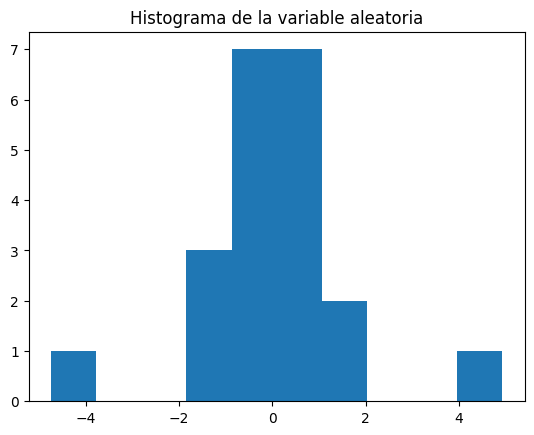

In [17]:
# Realizmaos un histograma de estas distribuciones
plt.figure()
plt.hist(valores_percentiles)
plt.title("Histograma de la variable aleatoria")
plt.show()

##### ¿Qué son la curtosis y la asimetría de una distribución? 

La curtosis es una medida estadística que nos habla de la forma de una distribución. Nos habla de cuan alejados de la medida tenemos los datos.
Esto no quiere decir que tenemos mayor varianza sino, más bien, nos habla de cuan largas son las colas de la distribución.

Tenemos dos tipos de curtosis en general: Una curtosis convencional y una curtosis en exceso. Como la curtosis de una distribución normal estandar
es igual a 3, lo que suele hacerse es ajustar el momento cuatro restandole un 3 para que la curtosis de una normal sea igual a 0.

Por otro lado, la curtosis nos dice cuantos valores tenemos por derecha y por izquierda respuesto a la media de una distribución. Es por eso que se utiliza el momento 3 con el objetivo de seguir mantendiendo el signo. Por ejemplo, al hablar de una distribución de rendimientos, tenes un sesgo (o una distribución asimétrica a la derecha) positivo nos dice que tenemos más valores a la derecha de la media aunque esto nos puede esta hablando de valores anómalos también. Acá es donde es importante interpretar la kurtosis.

Ambos conceptos son útiles a la hora de analizar si una distribución es semejante a una normal o no. Que se cumpla esta propiedad nos puede ayudar a simplificar muchos inconvenientes que podemos tener en el modelado

In [18]:
# Calculamos los momentos de orden 3 (asimetría o sesgo) y el momento de orden 4 (kurtosis).
print('Curtosis de Fisher (en exceso):' + str(st.kurtosis(s1)))
print('Curtosis de Person:' + str(st.kurtosis(s1, fisher=False)))
print('Medida de asimetría:' + str(st.skew(s1)))
print('Media:' + str(np.mean(s1)))
print('Desvío estandar (volatilidad):' + str(np.std(s1)))

Curtosis de Fisher (en exceso):0.006240359131540529
Curtosis de Person:3.0062403591315405
Medida de asimetría:0.0047968342293901525
Media:0.001159232056398871
Desvío estandar (volatilidad):1.001163366593308


##### ¿Qué son las colas largas y las colas pesadas de una distribución? 

Los conceptos de colas largas y colas pesadas generalmente se usan indistintamente ya que ambos significan una mayor frecuencia en la ocurrencia de valores extrémos. No obstante, el concepto de colas pesadas también generalmente esta asociado a una mayor varianza producto que la velocidad con la que caen las colas es mucho menor.

In [19]:
# Calculamos los momentos de orden 3 (asimetría o sesgo) y el momento de orden 4 (kurtosis).
print('Curtosis de Fisher (en exceso):' + str(st.kurtosis(s2)))
print('Curtosis de Person:' + str(st.kurtosis(s2, fisher=False)))
print('Medida de asimetría:' + str(st.skew(s2)))
print('Media:' + str(np.mean(s2)))
print('Desvío estandar (volatilidad):' + str(np.std(s2)))

Curtosis de Fisher (en exceso):1.481663108609685
Curtosis de Person:4.481663108609685
Medida de asimetría:0.00044242197020956327
Media:-0.0002615998378868577
Desvío estandar (volatilidad):1.1553835167668882


##### Estadístico de normalidad jarque bera:

$$
JB = \frac{n}{6} \left( S^2 + \frac{1}{4}(K-3)^2 \right)
$$

Donde,

$$
S={\frac {{\hat {\mu }}_{3}}{{\hat {\sigma }}^{3}}}={\frac {{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{3}}{\left({\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\right)^{3/2}}}
$$

$$
K={\frac {{\hat {\mu }}_{4}}{{\hat {\sigma }}^{4}}}={\frac {{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{4}}{\left({\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\right)^{2}}}
$$

Lo que podemos ver acá es que los momentos de orden 3 y de orden 4 estan normalizados alrededor de la varianza. Esto, cuando hablamos de una variable aleatoria que se distribuye normalmente vemos que la varianza es igual a 1. Pero en este caso estamos generalizando el caso.

Si lo pensamos intuitivamente, si la curtosis es muy grande el estadístico de jarque bera será lo suficientemente grande y eso genera que el valor del test de jarque bera (se distribuye asintoticamente como una chi cuadrado) sea muuy grande y eso genera que el p-value se encuentre muy a la derecha de la distribución. Con lo cual, el p-value es muy chico dado que no tenemos más probabilidad acumulada de la derecha.

La hipótesis nula del test de jarque bera es la normalidad de la distribución.

##### ¿Qué es el p-value?:

El p-value es la probabilidad de obtener un resultado al menos tan extremo como el observado, asumiendo que  la hipótesis nula es verdadera. En otras palabras, es la probabilidad de observar los datos que has recolectado (o resultados más extremos) si la hipótesis nula es cierta. En términos sencillos, el p-value es el área bajo al función de densidad (probabilidad) que acumula a partir de un determinado nivel de confianza.

$$
p=\Pr(T\geq t\mid H_{0})
$$

Por esta razón es la que se dice que valores bajos del p-value nos permiten rechazar la hipotesis nula. Si la probabilidad es muy chiquita (es decir, el p-value es muy chico) quiere decir que verdaderamente tuve un evento extremo en mi distribución y la probabilidad de encontrar otro evento extremo es muy baja. Con lo cual, puedo rechazar la hipótesis nula.

In [20]:
# Dejamos guardados los estadísticos
curtosis = st.kurtosis(s2)
asimetria = st.skew(s2)
media = np.mean(s2)
desvio = np.std(s2)

In [21]:
# Hacemos los cálculos del estadístico jarque bera
jb_stat = size/6 * (asimetria**2 + 1/4*curtosis**2)

# Cálculamos el p-value. Si el p-value es mayor al 5% no podemos rechazar la hipotesis nula de normalidad. Con una confianza del 95% porciento
# podemos afirmar que esta distribución se comporta como una normal.
p_value = 1 - st.chi2.cdf(jb_stat, df=2)

# Imprimimos los resultados
print(jb_stat)
print(p_value)
print(p_value > 0.05)

91471.93126515474
0.0
False


In [22]:
# También podemos seguir la documentación de scipy para calcular el estadístico
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html
res = st.jarque_bera(s2)
print(res.statistic)
print(res.pvalue)

91471.93126515474
0.0


##### ¿Qué otras formas de inferir la normalidad tenemos?:

Las representaciones gráficas son muy útiles aunque a veces pueden ser engañosas. No toda distribución con una forma acampanada es una normal y es ahí donde toman relevancia tener en considereación los conceptos de kurtosis, asimétrica (colas largas o colas pesadas). Es por esto, que además de realizar un historgrama para visualizar los datos, conviene acompañarlo de un gráfico llamado QQplot (Quantile-Quantile).

En términos simples, un gráfico de QQplot lo que hace es agarrar nuestro set de datos y darle a cada punto el quantile que le correponda. Luego, con una distribución normal teorica hace lo mismo con los mismos quantiles. En nuestro caso, vamos a tener una muestra de 1 millón de datos con lo cual vamos a tener 1 millón de quantiles que también vamos a plasmar en la distribución normal. El gráfico no es más que la interección de los valores que representan cada una de las distribuciones. Si los datos se distribuyen como una normal, todos los datos deberían estar sobre una línea recta.

Los gráficos de QQplot nos pueden servir para comprar con cualquier otra distribución

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1200x600 with 0 Axes>

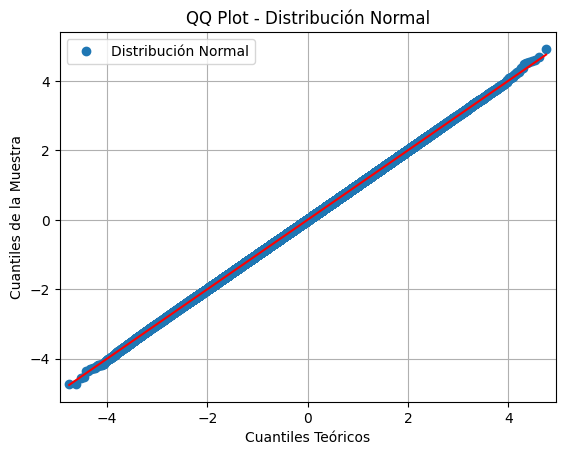

In [23]:
# También tenemos otras formas de analizar la normalidad de una variable aleatoria:
plt.figure(figsize=(12, 6))
sm.qqplot(s1, 
          line='s', 
          label='Distribución Normal', color='blue')
plt.title('QQ Plot - Distribución Normal')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

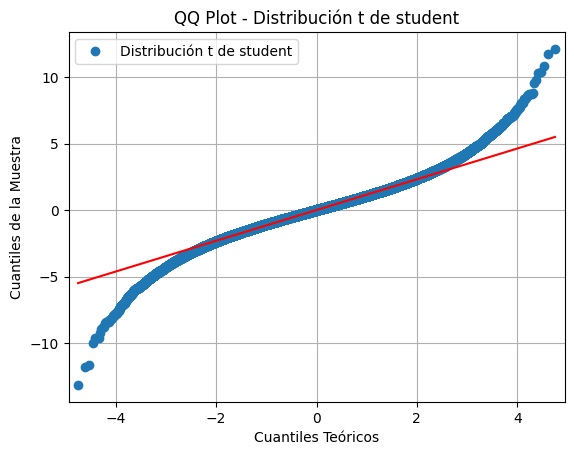

In [24]:
# También tenemos otras formas de analizar la normalidad de una variable aleatoria:
plt.figure(figsize=(12, 6))
sm.qqplot(s2, 
          line='s', 
          label='Distribución t de student', color='blue')
plt.title('QQ Plot - Distribución t de student')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.legend()
plt.grid(True)
plt.show()

##### Intervalos de confianza

Otro concepto importante. Siempre tratamos de estimar un valor en función de la media. Pero lo mejor, en lugar de utilizar un solo valor, es siempre dar un intervalo de confianza. Este intervalo es un rango en el cual con cierto porcentaje de confianza, nuestro valor se va a encontrar en dicho rango.

$$
{\displaystyle \operatorname {P} \left[{\bar {x}}-z_{\alpha /2}{\frac {\sigma }{\sqrt {n}}}\leq \mu \leq {\bar {x}}+z_{\alpha /2}{\frac {\sigma }{\sqrt {n}}}\right]=1-\alpha }
$$

Es una intuición muy simple, pero si estamos viendo un muestreo cuya media es 3% y tenemos un márgen de error de 1% con un 95% de confianza. Mi resultado va a estar entre un 2% y 4% el 95% de las veces.

**llevado a la práctica**: Si tenemos una media de 5% anual y sabemos que los intervalos de confianza de la media son: mu +- 1,96*Sigma (95% confianza)
Por ende, si tenemos un sigma chiquito (por ejemplo 1,5%) podemos afirmar que con un nivel de confianza del 95% todo el intervalo de confianza es positivo! Y eso en términos de rendimientos es muy bueno. Esto deja fuera retornos muy positivos pero también muy negativos. Con lo cual, depende del perfil del inversor.

Esto que generalizamos arriba es una **regla empírica** que tiene por detrás el supuesto que de los errores de nuestro muestreo se distribuyen como una distribución normal y además que la media de los errores es 0 (no tenemos un sesgo en nuestra distribución). Por eso podemos usar los valores de la normal inversa al 90, 95 y 99 porciento.

In [25]:
# Para esto podemos calcular la inversa de la función de distribución acumulada
# Intervalo de confianza del 90%
z_90 = st.norm.ppf(0.95)

# Intervalo de confianza del 95%
z_95 = st.norm.ppf(0.975) 

# Intervalo de confianza del 99%
z_99 = st.norm.ppf(0.995) 

print("Z para 90% de confianza:", z_90)
print("Z para 95% de confianza:", z_95)
print("Z para 99% de confianza:", z_99)

Z para 90% de confianza: 1.6448536269514722
Z para 95% de confianza: 1.959963984540054
Z para 99% de confianza: 2.5758293035489004


In [26]:
# Podemos hacer el camino inverso
Confianza = st.norm.cdf(2.5758293035489004)
Confianza

0.995